<a href="https://colab.research.google.com/github/igorjoz/machine-learning-course-and-projects/blob/main/18_Fuzzy_logic_implementation_in_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

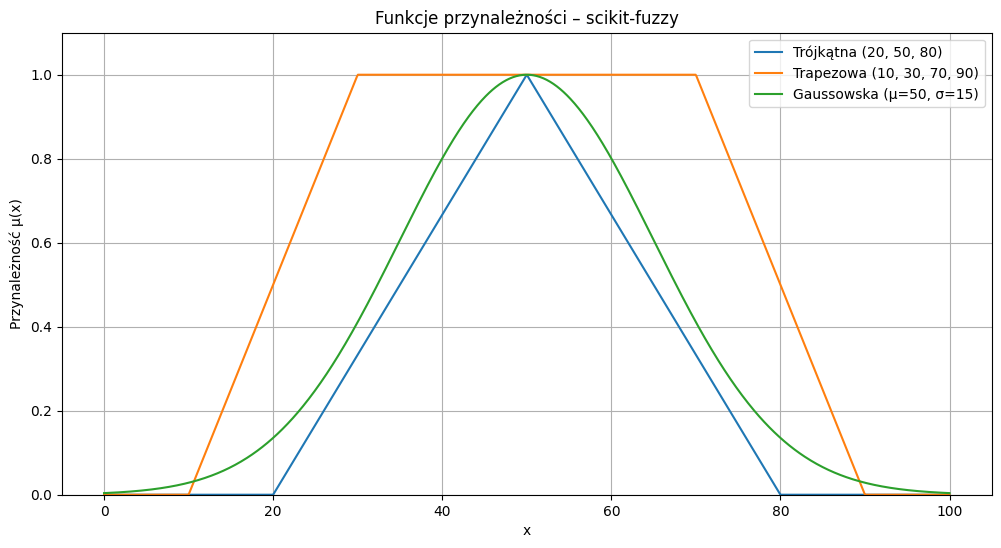

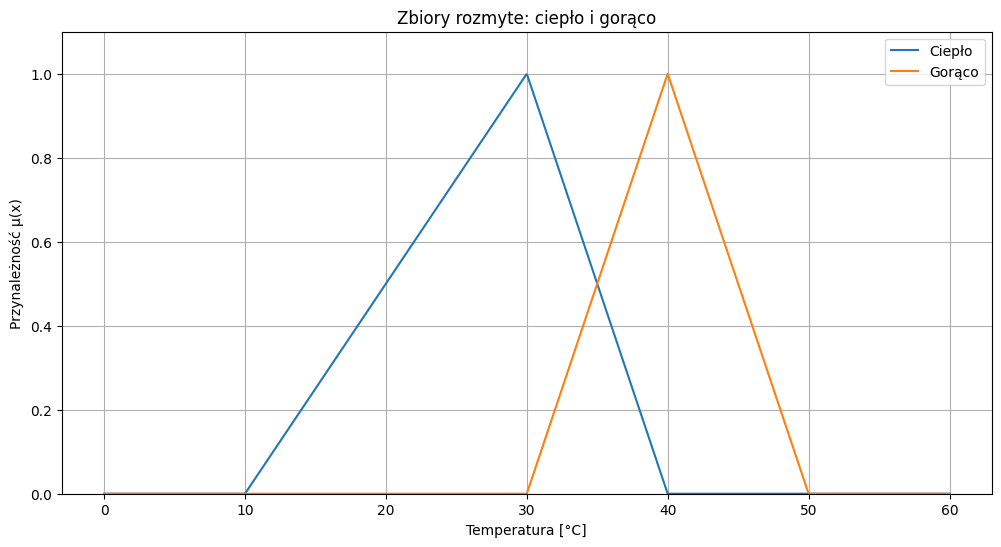

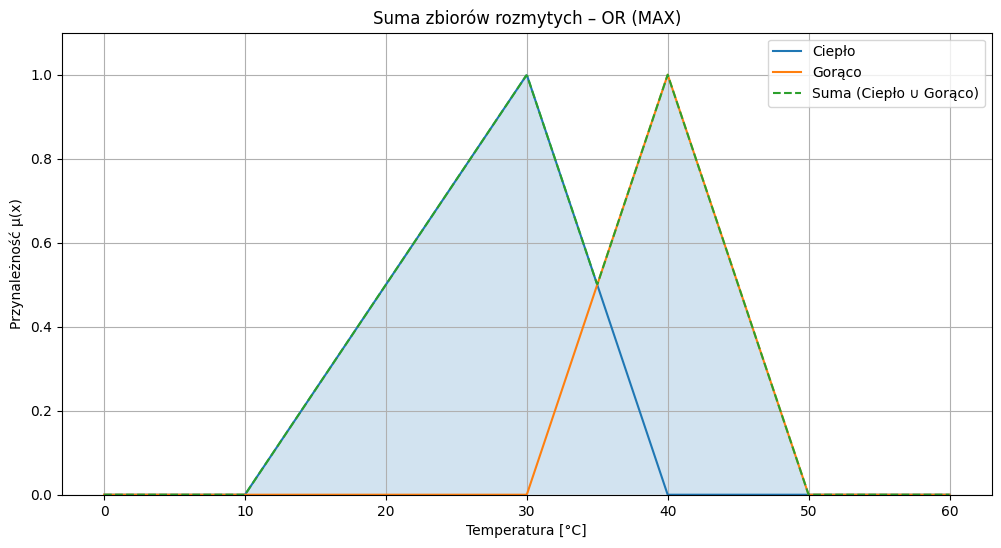

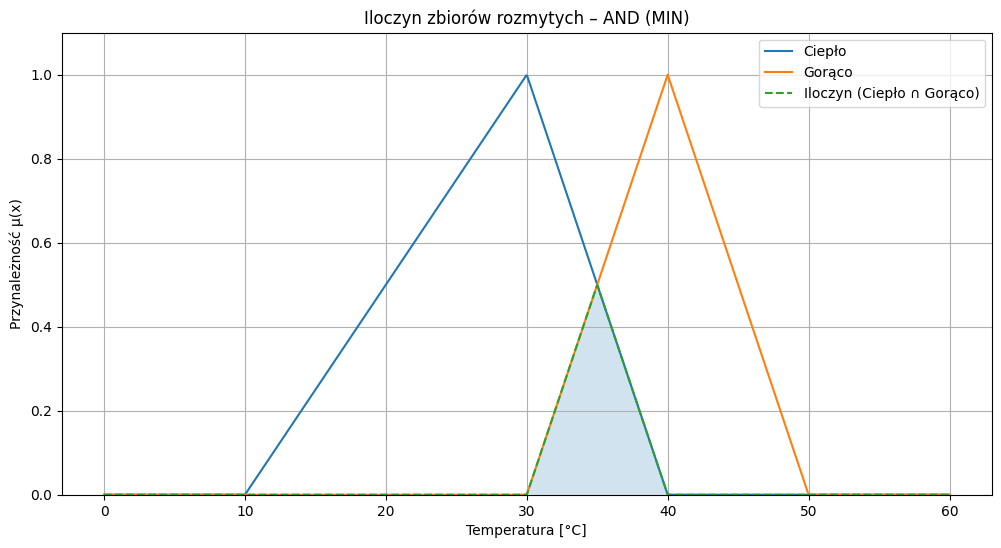

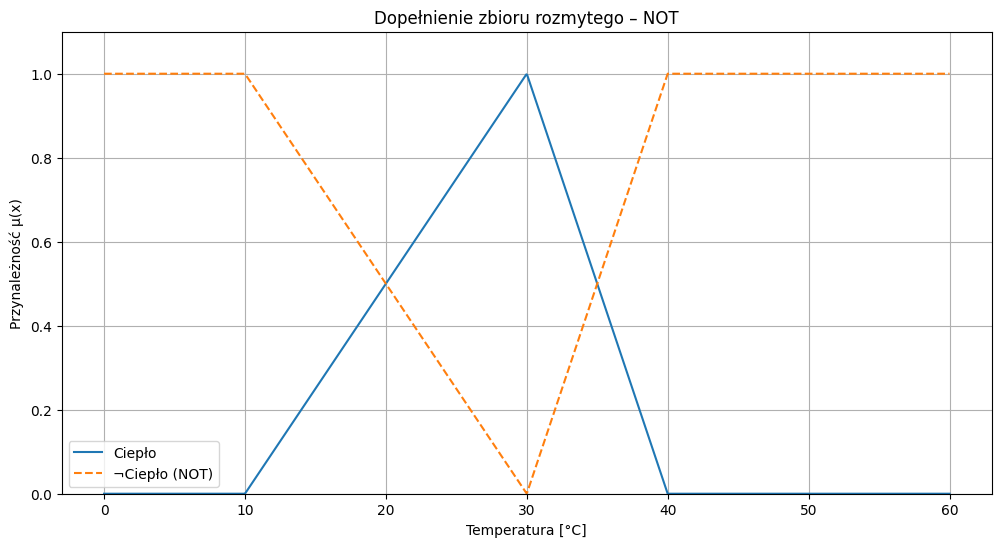

Poziom ataku: 73.98


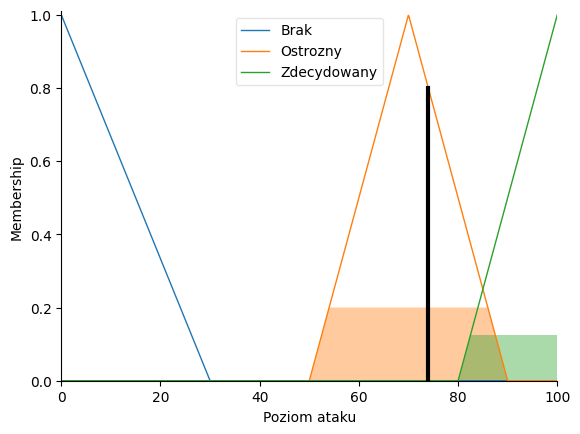

In [ ]:
# Instalacja biblioteki scikit-fuzzy
!pip install -q scikit-fuzzy

# Import bibliotek
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Podstawowe funkcje przynależności: trójkątna, trapezowa, Gaussowska
x = np.linspace(0, 100, 1000)
trimf_vals = fuzz.trimf(x, [20, 50, 80])
trapmf_vals = fuzz.trapmf(x, [10, 30, 70, 90])
gaussmf_vals = fuzz.gaussmf(x, mean=50, sigma=15)

plt.figure(figsize=(12, 6))
plt.plot(x, trimf_vals, label='Trójkątna (20, 50, 80)')
plt.plot(x, trapmf_vals, label='Trapezowa (10, 30, 70, 90)')
plt.plot(x, gaussmf_vals, label='Gaussowska (μ=50, σ=15)')
plt.title('Funkcje przynależności – scikit-fuzzy')
plt.xlabel('x')
plt.ylabel('Przynależność μ(x)')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# 2. Zbiory "ciepło" i "gorąco"
x_temp = np.linspace(0, 60, 1000)
cieplo = fuzz.trimf(x_temp, [10, 30, 40])
goraco = fuzz.trimf(x_temp, [30, 40, 50])

plt.figure(figsize=(12, 6))
plt.plot(x_temp, cieplo, label='Ciepło')
plt.plot(x_temp, goraco, label='Gorąco')
plt.title('Zbiory rozmyte: ciepło i gorąco')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# 3. Suma zbiorów (OR)
suma = np.maximum(cieplo, goraco)

plt.figure(figsize=(12, 6))
plt.plot(x_temp, cieplo, label='Ciepło')
plt.plot(x_temp, goraco, label='Gorąco')
plt.plot(x_temp, suma, '--', label='Suma (Ciepło ∪ Gorąco)')
plt.fill_between(x_temp, 0, suma, alpha=0.2)
plt.title('Suma zbiorów rozmytych – OR (MAX)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# 4. Iloczyn zbiorów (AND)
iloczyn = np.minimum(cieplo, goraco)

plt.figure(figsize=(12, 6))
plt.plot(x_temp, cieplo, label='Ciepło')
plt.plot(x_temp, goraco, label='Gorąco')
plt.plot(x_temp, iloczyn, '--', label='Iloczyn (Ciepło ∩ Gorąco)')
plt.fill_between(x_temp, 0, iloczyn, alpha=0.2)
plt.title('Iloczyn zbiorów rozmytych – AND (MIN)')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# 5. Negacja zbioru (NOT)
not_cieplo = 1 - cieplo

plt.figure(figsize=(12, 6))
plt.plot(x_temp, cieplo, label='Ciepło')
plt.plot(x_temp, not_cieplo, '--', label='¬Ciepło (NOT)')
plt.title('Dopełnienie zbioru rozmytego – NOT')
plt.xlabel('Temperatura [°C]')
plt.ylabel('Przynależność μ(x)')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# 6. Wnioskowanie rozmyte – konfiguracja zmiennych i reguł
x_life = np.linspace(0, 100, 1000)
x_dist = np.linspace(0, 50, 1000)

# Definicja zmiennych wejściowych i wyjściowej
tab_life = ctrl.Antecedent(x_life, 'Zycie gracza')
tab_dist = ctrl.Antecedent(x_dist, 'Odleglosc')
attack = ctrl.Consequent(np.linspace(0, 100, 1000), 'Poziom ataku')

# Funkcje przynależności – życie
tab_life['Niskie'] = fuzz.trimf(tab_life.universe, [0, 0, 40])
tab_life['Srednie'] = fuzz.trimf(tab_life.universe, [30, 50, 70])
tab_life['Wysokie'] = fuzz.trimf(tab_life.universe, [60, 100, 100])

# Funkcje przynależności – odległość
tab_dist['Mala'] = fuzz.trimf(tab_dist.universe, [0, 0, 15])
tab_dist['Duza'] = fuzz.trimf(tab_dist.universe, [10, 50, 50])

# Funkcje przynależności – atak
attack['Brak'] = fuzz.trimf(attack.universe, [0, 0, 30])
attack['Ostrozny'] = fuzz.trimf(attack.universe, [50, 70, 90])
attack['Zdecydowany'] = fuzz.trimf(attack.universe, [80, 100, 100])

# Definicja reguł
rule1 = ctrl.Rule(tab_life['Niskie'], attack['Zdecydowany'])
rule2 = ctrl.Rule(tab_life['Srednie'] & tab_dist['Duza'], attack['Ostrozny'])
rule3 = ctrl.Rule(tab_life['Srednie'] & tab_dist['Mala'], attack['Ostrozny'])
rule4 = ctrl.Rule(tab_life['Wysokie'] & tab_dist['Mala'], attack['Brak'])

# Budowa i symulacja systemu
attack_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
attack_sim = ctrl.ControlSystemSimulation(attack_ctrl)

# Poprawne przypisanie danych wejściowych
attack_sim.input['Zycie gracza'] = 35
attack_sim.input['Odleglosc']    = 12

# Obliczenie wyniku
attack_sim.compute()
print(f"Poziom ataku: {attack_sim.output['Poziom ataku']:.2f}")

# Wizualizacja rozmytego wyniku (używamy zmiennej 'attack')
attack.view(sim=attack_sim)
